In [63]:
# External Modules
from darts import TimeSeries
import matplotlib.pyplot as plt
from darts.models import XGBModel

NameError: name '_C' is not defined

In [ ]:
# Imports and path setting
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
# Get the parent directory of the notebook directory
parent_dir = os.path.dirname(notebook_dir)
# Append the parent directory to the system path
sys.path.append(parent_dir)

In [ ]:
# Now you can import modules from the 'data' folder
from data.prepared_data import df
display(df)

,datetime,bid_open,bid_high,bid_low,bid_close,ask_open,ask_high,ask_low,ask_close
96,2020-01-02 00:00:00,1.12184,1.12186,1.12156,1.12157,1.12198,1.12199,1.12167,1.12168
97,2020-01-02 00:15:00,1.12154,1.12164,1.12151,1.12155,1.12168,1.12177,1.12165,1.12169
98,2020-01-02 00:30:00,1.12157,1.12169,1.12152,1.12167,1.12169,1.12182,1.12164,1.12181
99,2020-01-02 00:45:00,1.12169,1.12183,1.12169,1.12178,1.12181,1.12197,1.12181,1.12191
100,2020-01-02 01:00:00,1.12177,1.12225,1.12176,1.12221,1.12190,1.12238,1.12188,1.12234
...,...,...,...,...,...,...,...,...,...
143708,2024-02-05 23:00:00,1.07424,1.07426,1.07414,1.07419,1.07443,1.07445,1.07431,1.07439
143709,2024-02-05 23:15:00,1.07419,1.07426,1.07419,1.07423,1.07439,1.07443,1.07434,1.07438
143710,2024-02-05 23:30:00,1.07423,1.07423,1.07403,1.07420,1.07438,1.07440,1.07420,1.07437
143711,2024-02-05 23:45:00,1.07420,1.07427,1.07401,1.07404,1.07437,1.07443,1.07417,1.07419


In [ ]:
# Trim DataFrame to smaller size, such that training takes less time
# THIS IS JUST TEMPORARY TO MAKE TESTING EASIER: TEMOVE LATER!!!!!

# Calculate the number of rows to select (30% of total rows)
selection_share = 0.1
rows_to_select = int(len(df) * selection_share)

# Select the first 30% of rows
df = df.head(rows_to_select)

# Get length of current DataFrame
print(f'Number of rows: {len(df)}')

Number of rows: 10192


In [ ]:
# Save datetiem column
dates = df['datetime']

# Reset index to a range of integers
df.reset_index(drop=True, inplace=True)

# Extract traget and covariate columns
target_col = df['bid_open']
covariate_cols = df[['bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]

# Create Darts TimeSeries objects
target_series = TimeSeries.from_series(target_col)
cov_series = TimeSeries.from_series(covariate_cols)

In [ ]:
# Split the data into training and validation sets
train_split = 0.3
train_size = int(len(target_series) * train_split)
train, val = target_series[:train_size], target_series[train_size:]

<Axes: xlabel='time'>

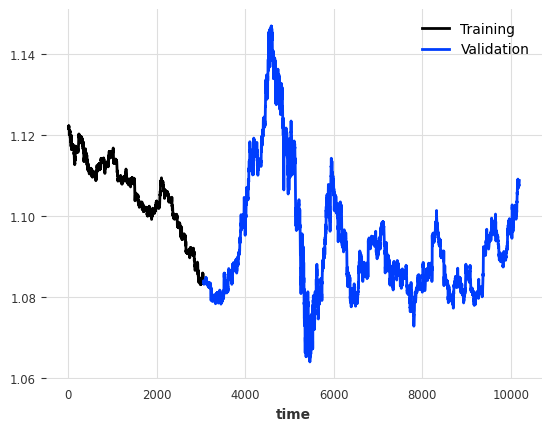

In [ ]:
train.plot(label = 'Training')
val.plot(label = 'Validation')

In [ ]:
model = XGBModel(lags=12)

# Train the model
model.fit(train)

# Make predictions for the validation set
forecast = model.predict(n=len(val))

# You can also evaluate the forecast if you have ground truth values for validation set
# For example, if you have validation ground truth values in a variable named 'val_ground_truth':
# from darts.metrics import mape
# print('MAPE:', mape(val_ground_truth, forecast))

# Plot the forecast
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
train.plot(label='train')
val.plot(label='val')
forecast.plot(label='forecast')
plt.legend()
plt.show()


NameError: name 'XGBModel' is not defined